# IMPORTING PACKAGES

In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import yfinance as yf 

# IMPORTING THE DATASET

In [82]:
df = pd.read_csv(r"india-stock-market-tcs-daily-update.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,27.853655,212976
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,27.476564,153576
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,25.582233,822776
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,25.582233,0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,25.520847,811856


# DATA CLEANING AND PREPROCESSING 

> ***ANALYZING THE DATASET***

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5469 entries, 0 to 5468
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5469 non-null   object 
 1   Open       5469 non-null   float64
 2   High       5469 non-null   float64
 3   Low        5469 non-null   float64
 4   Close      5469 non-null   float64
 5   Adj Close  5469 non-null   float64
 6   Volume     5469 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 299.2+ KB


In [84]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

> ***DROP DUPLICATE ROWS***

In [85]:
df.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,27.853655,212976
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,27.476564,153576
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,25.582233,822776
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,25.582233,0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,25.520847,811856
...,...,...,...,...,...,...,...
5464,2024-08-19,4421.000000,4494.250000,4390.350098,4490.000000,4490.000000,2055210
5465,2024-08-20,4505.000000,4565.000000,4500.000000,4523.299805,4523.299805,2212298
5466,2024-08-21,4518.000000,4560.000000,4492.549805,4551.500000,4551.500000,1896990
5467,2024-08-22,4560.000000,4560.950195,4497.200195,4502.000000,4502.000000,1829872


> ***IDENTIFY MISSING VALUES***

In [86]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

> ***CONVERT "Date" COLUMN FORMAT***

In [87]:
df["Date"]=pd.to_datetime(df["Date"])

In [88]:
df=df.sort_values(by="Date")
df = df.sort_values(by='Date').reset_index(drop=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5469 entries, 0 to 5468
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5469 non-null   datetime64[ns]
 1   Open       5469 non-null   float64       
 2   High       5469 non-null   float64       
 3   Low        5469 non-null   float64       
 4   Close      5469 non-null   float64       
 5   Adj Close  5469 non-null   float64       
 6   Volume     5469 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 299.2 KB


> ***STATISTICAL SUMMARY***

In [90]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,5469,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5.469000e+03
mean,2013-07-24 09:49:47.822271232,1240.406235,1253.135737,1226.979688,1239.958827,1115.980960,3.185244e+06
min,2002-08-12 00:00:00,32.474998,36.450001,32.474998,35.474998,24.889400,0.000000e+00
25%,2007-12-31 00:00:00,242.500000,246.237503,238.000000,241.550003,174.354034,1.646502e+06
50%,2013-07-17 00:00:00,822.525024,842.474976,822.000000,830.200012,663.876892,2.490260e+06
75%,2019-02-05 00:00:00,1985.000000,2004.250000,1968.300049,1985.150024,1765.560547,3.935820e+06
max,2024-08-23 00:00:00,4560.000000,4565.000000,4500.000000,4551.500000,4551.500000,8.806715e+07
std,NaN,1191.835161,1202.262257,1181.086731,1191.660969,1161.636342,3.115549e+06


# BASIC INSIGHTS

> ***TREND ANALYSIS*** 

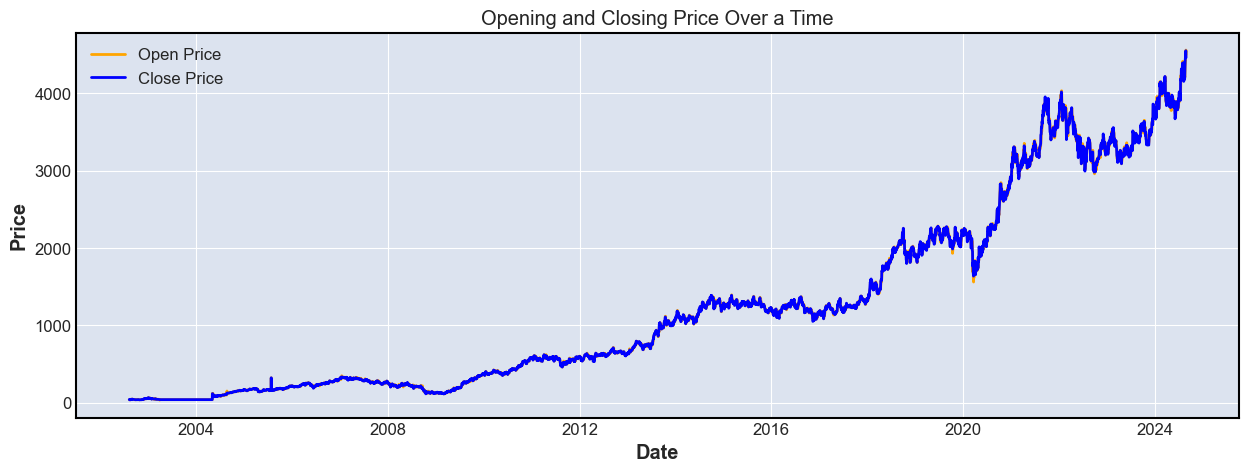

In [91]:
plt.figure(figsize = (15,5))
plt.plot(df['Date'], df["Open"], label="Open Price", color="orange")
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title("Opening and Closing Price Over a Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

> ***UNDERSTAND DAILY VOLATILITY***

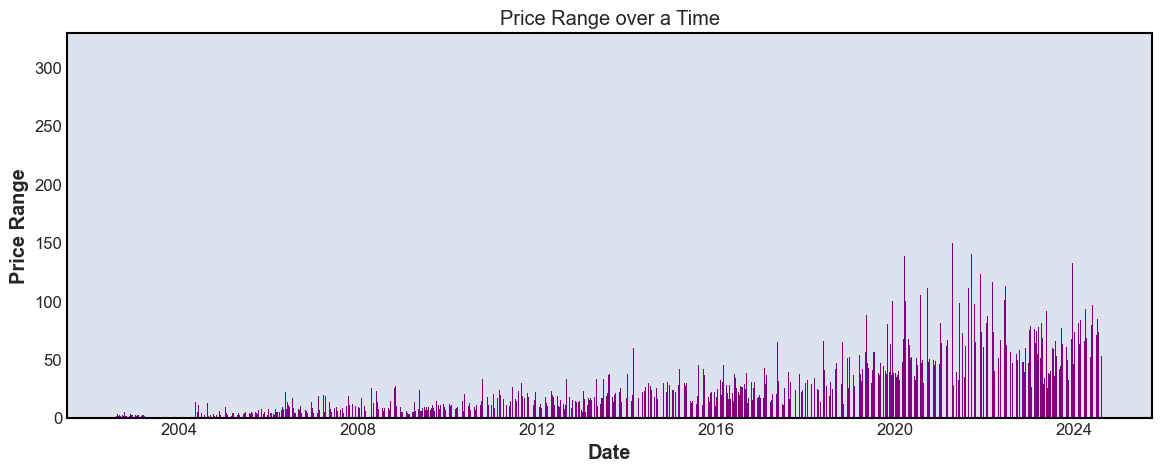

In [92]:
# Add New Price Range Column
df["Price_Range"]=df["High"]-df["Low"]

# plot price range over time
plt.figure(figsize=(14, 5))
plt.bar(df["Date"], df["Price_Range"], color="Purple")
plt.title("Price Range over a Time")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.grid()
plt.show()



> ***VOLUME ANALYSIS*** 

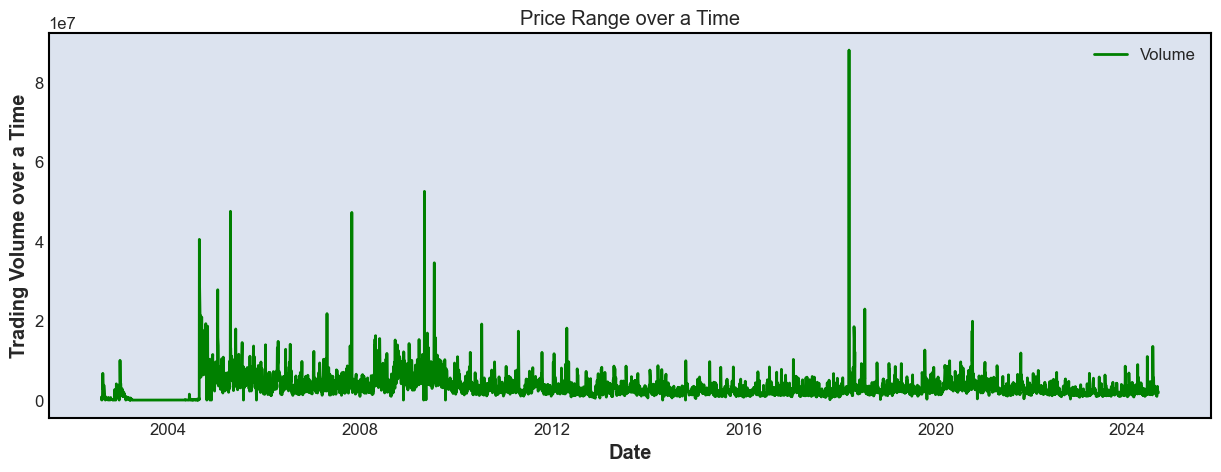

In [93]:
plt.figure(figsize = (15,5))
plt.plot(df["Date"],df["Volume"],label="Volume", color="Green")
plt.title("Price Range over a Time")
plt.xlabel("Date")
plt.ylabel("Trading Volume over a Time")
plt.legend()
plt.grid()
plt.show()


> ***CORRELATION ANALYSIS***

In [94]:
Correlation = df[["Open", "High", "Low", "Close", "Adj Close", "Volume", "Price_Range"]].corr()
Correlation

,Open,High,Low,Close,Adj Close,Volume,Price_Range
Open,1.000000,0.999914,0.999922,0.999828,0.998235,-0.139939,0.793959
High,0.999914,1.000000,0.999908,0.999936,0.998317,-0.137826,0.798480
Low,0.999922,0.999908,1.000000,0.999923,0.998395,-0.141374,0.790227
Close,0.999828,0.999936,0.999923,1.000000,0.998422,-0.139529,0.794897
Adj Close,0.998235,0.998317,0.998395,0.998422,1.000000,-0.137321,0.789595
Volume,-0.139939,-0.137826,-0.141374,-0.139529,-0.137321,1.000000,0.047696
Price_Range,0.793959,0.798480,0.790227,0.794897,0.789595,0.047696,1.000000


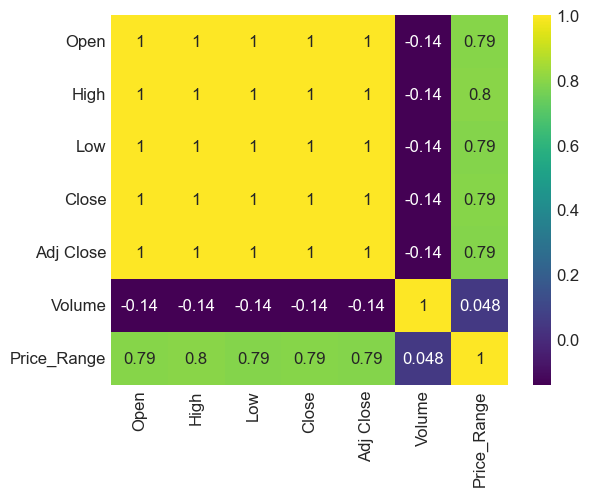

In [95]:
sns.heatmap(Correlation, annot=True, cmap="viridis")
plt.show()        

# MOVING AVERAGE

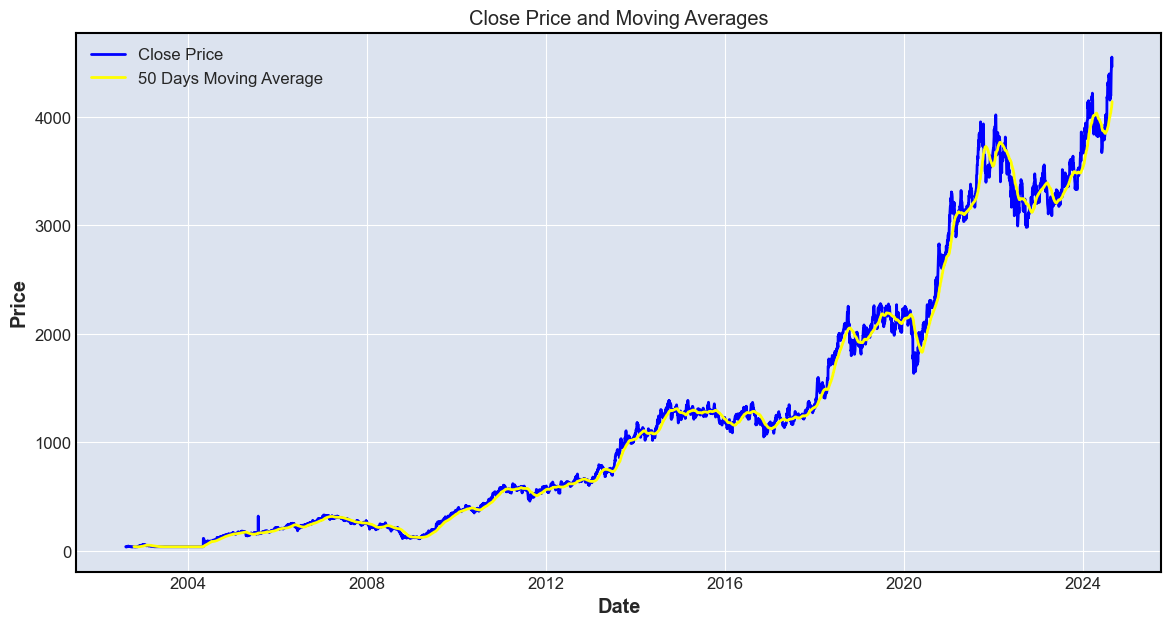

In [96]:
#Calculate moving averages
df["50_MA"]=df["Close"].rolling(window=50).mean()


# Plot Close price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(df["Date"], df["Close"], label="Close Price", color="Blue")
plt.plot(df["Date"], df["50_MA"], label="50 Days Moving Average", color="Yellow")
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# QUARTERLY REPORT

In [97]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Range,50_MA
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,27.853655,212976,1.275002,NaN
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,27.476564,153576,1.512501,NaN
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,25.582233,822776,3.525002,NaN
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,25.582233,0,0.000000,NaN
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,25.520847,811856,2.250000,NaN


In [98]:
# Set "date" as index
df.set_index("Date", inplace=True)

In [99]:
# Filter data for a specific quarter (e.g., Q1 2024)
start_date = '2024-01-01'
end_date = '2024-03-31'
df_quarter = df[start_date:end_date]

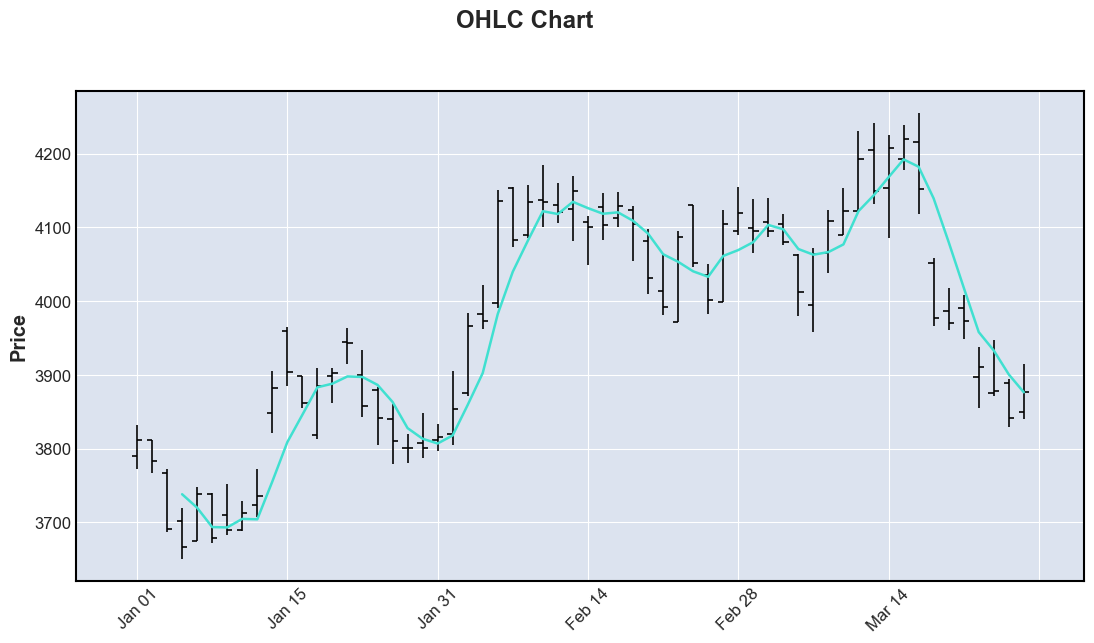

In [100]:
mpf.plot(df_quarter, type="ohlc", title="OHLC Chart", figsize=(14, 7), mav=4 )

<Figure size 1400x700 with 0 Axes>

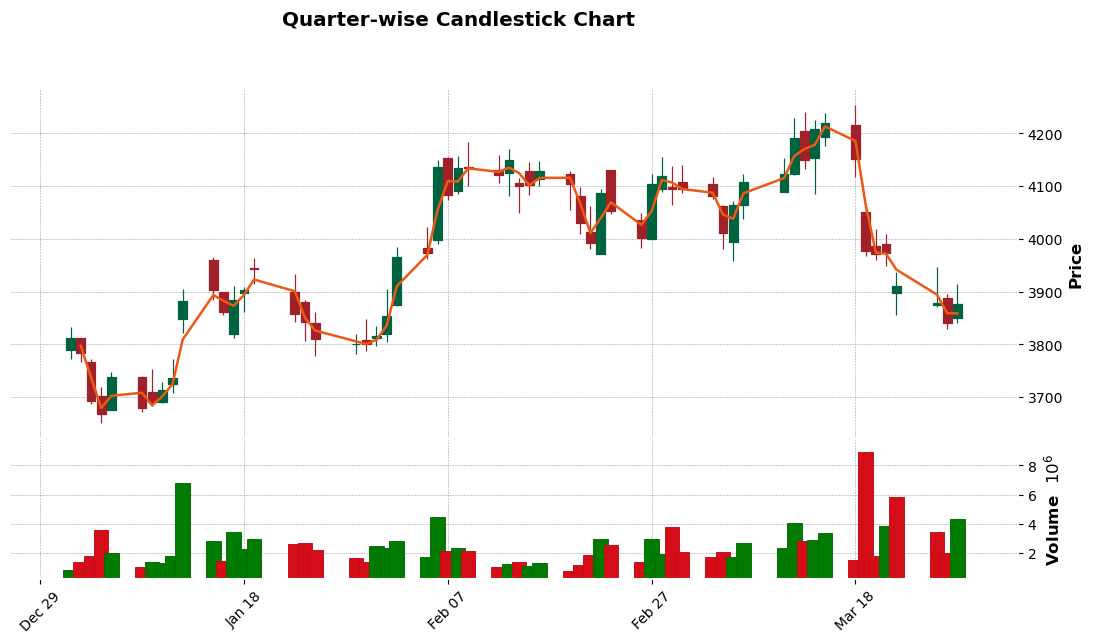

In [101]:
# Plot the candlestick chart
plt.figure(figsize=(14, 7))
mpf.plot(df_quarter, type='candle',style='charles', title='Quarter-wise Candlestick Chart', volume=True, mav=2, show_nontrading=True, 
figsize=(14, 7))